In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import datetime
import tarfile
import json

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,label_binarize,LabelBinarizer
from sklearn.svm import LinearSVC, SVC,libsvm_sparse
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import NMF, LatentDirichletAllocation

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import string
import textblob as tb
import warnings; warnings.simplefilter('ignore')
import collections

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import tarfile
tar = tarfile.open("/home/ubuntu/reviews_hackathon_data_Train_test_problem_statement/reviews_hackathon_data_Train_test_problem_statement/train.tar.gz")
files = tar.getmembers()
f = tar.extractfile(files[5]) # if your docs.json is in the 0th position
f.readlines()

[b'{"organizations": [], "uuid": "b6c14b1e1e9c8596ea628a40cdc3909d8665829f", "thread": {"social": {"gplus": {"shares": 0}, "pinterest": {"shares": 0}, "vk": {"shares": 0}, "linkedin": {"shares": 0}, "facebook": {"likes": 0, "shares": 0, "comments": 0}, "stumbledupon": {"shares": 0}}, "site_full": "fr-be.trustpilot.com", "main_image": "https://images-static.trustpilot.com/community/shared/tp_social_logo.png", "site_section": "https://fr-be.trustpilot.com/review/www.euroflorist.be", "section_title": "Avis marchands de Euroflorist Belgique / Belgi\xc3\xab | Avis - Euroflorist Belgique / Belgi\xc3\xab | www.euroflorist.be", "url": "https://fr-be.trustpilot.com/reviews/58b52e37d502cd0ac0b49c11", "country": "US", "domain_rank": 1822, "title": "Evans Odinga", "performance_score": 0, "site": "trustpilot.com", "participants_count": 1, "title_full": "Euroflorist Belgique / Belgi\xc3\xab \xc3\xa9valu\xc3\xa9 par Evans Odinga", "spam_score": 0.336, "site_type": "discussions", "published": "2017-02

# build classification model

In [4]:
#tar.gz to dataframe
file_path="/home/ubuntu/reviews_hackathon_data_Train_test_problem_statement/reviews_hackathon_data_Train_test_problem_statement/train.tar.gz"
contect_list=[]
tag_list=[]
tar = tarfile.open(file_path, "r:gz")
for member in tar.getmembers():
    f = tar.extractfile(member)
    if f is not None:
        content = f.read()
        data = json.loads(content)
        contect_list.append(data)
        tag_list.append(member.name.split('/')[1])
df_data=pd.io.json.json_normalize(contect_list)
df_data['tag'] = tag_list
df_data.head()

,author,crawled,entities.locations,entities.organizations,entities.persons,external_links,highlightText,highlightTitle,language,locations,...,thread.social.vk.shares,thread.spam_score,thread.title,thread.title_full,thread.url,thread.uuid,title,url,uuid,tag
0,Micheal Doherty,2017-02-11T10:13:40.529+02:00,[],[],[],[],,,english,[],...,0,0.017,Micheal Doherty,Life Style Sports reviewed by Micheal Doherty,https://ie.trustpilot.com/reviews/589dd2aa8455...,3a9217f8dff52ce7222be0d377253decb6ce91c8,Micheal Doherty,https://ie.trustpilot.com/reviews/589dd2aa8455...,3a9217f8dff52ce7222be0d377253decb6ce91c8,eng_positive
1,Danny,2017-02-20T21:06:26.960+02:00,[],[],[],[],,,english,[],...,0,0.140,Danny,Homeadvisor reviewed by Danny,https://www.trustpilot.com/reviews/58a47944b9d...,00514b440237a601b934d9d0fdbbe279bd10b07e,Danny,https://www.trustpilot.com/reviews/58a47944b9d...,00514b440237a601b934d9d0fdbbe279bd10b07e,eng_positive
2,GARRE.,2017-03-16T22:42:28.453+02:00,[],[],[],[],,,english,[],...,0,0.070,GARRE.,Foto.com Espana evaluado por GARRE.,https://es.trustpilot.com/reviews/58bfeea7ed30...,53d3044024694c18ed2d828f22c3b1449e1bd4dd,GARRE.,https://es.trustpilot.com/reviews/58bfeea7ed30...,53d3044024694c18ed2d828f22c3b1449e1bd4dd,eng_negative
3,Michael,2017-03-22T05:38:08.049+02:00,[],[],[],[],,,english,[],...,0,0.154,Michael,Thrift Books reviewed by Michael,https://www.trustpilot.com/reviews/58d1ec308b6...,03159dd8984e7ef606f9f3fd127de5d1dc37680f,Michael,https://www.trustpilot.com/reviews/58d1ec308b6...,03159dd8984e7ef606f9f3fd127de5d1dc37680f,eng_positive
4,"Pol van de, B.",2017-02-25T10:56:02.533+02:00,[],[],[],[],,,english,[],...,0,0.001,"Pol van de, B.","AMOMA.com bewertet von Pol van de, B.",https://ch.trustpilot.com/reviews/58b0f716d502...,e41c66f740a7d592f8b1e83e63c17166e7bf3955,"Pol van de, B.",https://ch.trustpilot.com/reviews/58b0f716d502...,e41c66f740a7d592f8b1e83e63c17166e7bf3955,eng_positive


In [5]:
def parse(row):
    if row['tag']=='eng_positive':
        val='positive'
    elif row['tag']=='eng_negative':
        val='negative'
    return val


In [6]:
df_data['tag']=df_data.apply(parse,axis=1)


In [7]:
df_data.head()

,author,crawled,entities.locations,entities.organizations,entities.persons,external_links,highlightText,highlightTitle,language,locations,...,thread.social.vk.shares,thread.spam_score,thread.title,thread.title_full,thread.url,thread.uuid,title,url,uuid,tag
0,Micheal Doherty,2017-02-11T10:13:40.529+02:00,[],[],[],[],,,english,[],...,0,0.017,Micheal Doherty,Life Style Sports reviewed by Micheal Doherty,https://ie.trustpilot.com/reviews/589dd2aa8455...,3a9217f8dff52ce7222be0d377253decb6ce91c8,Micheal Doherty,https://ie.trustpilot.com/reviews/589dd2aa8455...,3a9217f8dff52ce7222be0d377253decb6ce91c8,positive
1,Danny,2017-02-20T21:06:26.960+02:00,[],[],[],[],,,english,[],...,0,0.140,Danny,Homeadvisor reviewed by Danny,https://www.trustpilot.com/reviews/58a47944b9d...,00514b440237a601b934d9d0fdbbe279bd10b07e,Danny,https://www.trustpilot.com/reviews/58a47944b9d...,00514b440237a601b934d9d0fdbbe279bd10b07e,positive
2,GARRE.,2017-03-16T22:42:28.453+02:00,[],[],[],[],,,english,[],...,0,0.070,GARRE.,Foto.com Espana evaluado por GARRE.,https://es.trustpilot.com/reviews/58bfeea7ed30...,53d3044024694c18ed2d828f22c3b1449e1bd4dd,GARRE.,https://es.trustpilot.com/reviews/58bfeea7ed30...,53d3044024694c18ed2d828f22c3b1449e1bd4dd,negative
3,Michael,2017-03-22T05:38:08.049+02:00,[],[],[],[],,,english,[],...,0,0.154,Michael,Thrift Books reviewed by Michael,https://www.trustpilot.com/reviews/58d1ec308b6...,03159dd8984e7ef606f9f3fd127de5d1dc37680f,Michael,https://www.trustpilot.com/reviews/58d1ec308b6...,03159dd8984e7ef606f9f3fd127de5d1dc37680f,positive
4,"Pol van de, B.",2017-02-25T10:56:02.533+02:00,[],[],[],[],,,english,[],...,0,0.001,"Pol van de, B.","AMOMA.com bewertet von Pol van de, B.",https://ch.trustpilot.com/reviews/58b0f716d502...,e41c66f740a7d592f8b1e83e63c17166e7bf3955,"Pol van de, B.",https://ch.trustpilot.com/reviews/58b0f716d502...,e41c66f740a7d592f8b1e83e63c17166e7bf3955,positive


In [18]:
'''
# function for text preprocessing
def text_processing(row):
    review = re.sub('[^a-zA-Z]', ' ', row['text']) # match all strings that start with a letter, the second means match all strings that contain a non-letter
    review = review.lower() # lower case
    review = review.split() # split words
    wl = WordNetLemmatizer()  # bettwer way to remove suffix by keping meaning full words
    # remove most common english words in sentece 
    review = [wl.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] # aslo stops most common english words such as a,an, the in ,on etc
    review = ' '.join(review)
    return review

df_data['text1'] = df_data.apply(text_processing, axis=1)

'''

In [24]:
reviews = np.array(df_data['text'])
sentiments = np.array(df_data['tag'])

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3),max_features=223220)
X = cv.fit_transform(reviews)
#print(X.shape)
y = sentiments

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression

#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## model creation
#classifier = GaussianNB() #  Naive Bayes
classifier = LogisticRegression(random_state=0,class_weight='balanced')
#classifier = SGDClassifier(loss='hinge', n_iter=100)
#classifier=LinearSVC(class_weight='balanced')
#classifier= RandomForestClassifier()

## fitting the model
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


              precision    recall  f1-score   support

    positive       0.99      0.98      0.99     24494
    negative       0.73      0.79      0.76      1452

   micro avg       0.97      0.97      0.97     25946
   macro avg       0.86      0.89      0.87     25946
weighted avg       0.97      0.97      0.97     25946

[[24075   419]
 [  304  1148]]
0.7463566608419391


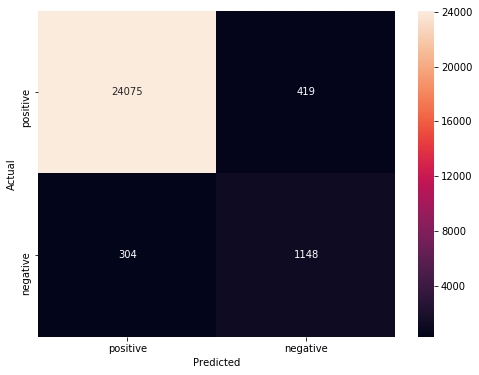

In [26]:
# matrix to measure classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

class_names=df_data['tag'].unique()


# print classification scores 
print(metrics.classification_report(y_test, y_pred,labels=['positive','negative'],target_names=['positive','negative']))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred,labels=['positive','negative'])

print(conf_mat)
print(matthews_corrcoef(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
df_data.tag.value_counts()

positive    122470
negative      7256
Name: tag, dtype: int64

# Adding sentiment score as a feature
- using nltk.sentimet.vader library to calculate sentiment score and add as a feature 

In [28]:
## sentiment score using nltk.sentiment.vader

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores1(sentence):
    score = analyser.polarity_scores(sentence['text'])
    return score


# function to convert compound score to sentiments( positive, negative, nutral)
def compound_to_nps_cat(row):
    if row['compound_score']>=0.05:
        val='POSITIVE'
    elif row['compound_score']<=-0.05:
        val='NEGATIVE'
    else:
        val='NEUTRAL'
    return val

# function to convert compound score to sentiments( positive, negative)

def compound_to_nps_cat1(row):
    if row['compound_score']>=0.0:
        val='POSITIVE'
    elif row['compound_score']<0.0:
        val='NEGATIVE'
    return val


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
df1=df_data[['text','tag']]
#df1
df1=df1.dropna(subset=['text']) # remove nan from Customer column by droping row
df1['sentiment_scores']=df1.apply(sentiment_analyzer_scores1,axis=1)
df1['compound_score']=df1['sentiment_scores'].apply(lambda raw:raw['compound'])
df1['neg_score']=df1['sentiment_scores'].apply(lambda raw:raw['neg'])
df1['pos_score']=df1['sentiment_scores'].apply(lambda raw:raw['pos'])
df1['neu_score']=df1['sentiment_scores'].apply(lambda raw:raw['neu'])
df1['sentiment_pred']=df1.apply(compound_to_nps_cat1,axis=1)
df1.head()

,text,tag,sentiment_scores,compound_score,neg_score,pos_score,neu_score,sentiment_pred
0,Ordered and arrived instore within a few days,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,POSITIVE
1,Satisfied with service I received,positive,"{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...",0.4215,0.000,0.483,0.517,POSITIVE
2,ES IMPOSIBLE PONERSE EN CONTACTO CON VOSOTROS....,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,POSITIVE
3,Was not in a rush it was Gods timing,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,POSITIVE
4,"Booking was easy, but you need to pay direct b...",positive,"{'neg': 0.257, 'neu': 0.67, 'pos': 0.073, 'com...",-0.6079,0.257,0.073,0.670,NEGATIVE


In [31]:
reviews = np.array(df1['text'])
sentiments = np.array(df1['tag'])

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3),max_features=223220)
X = cv.fit_transform(reviews)
#print(X.shape)
y = sentiments

In [39]:
# adding sentiment score to the sparce matrix

from scipy.sparse import hstack


X1=hstack((X,np.array(df1.compound_score)[:,None]))
X1=hstack((X1,np.array(df1.neg_score)[:,None]))
X1=hstack((X1,np.array(df1.pos_score)[:,None]))
X1=hstack((X1,np.array(df1.neu_score)[:,None]))

X1

<129726x223224 sparse matrix of type '<class 'numpy.float64'>'
	with 7071612 stored elements in COOrdinate format>

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression

#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.10, random_state = 0)

## model creation
#classifier = GaussianNB() #  Naive Bayes
classifier = LogisticRegression(random_state=0,class_weight='balanced')
#classifier = SGDClassifier()
#classifier=LinearSVC(class_weight='balanced')
#classifier= RandomForestClassifier()
#classifier=MultinomialNB()

## fitting the model
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


              precision    recall  f1-score   support

    positive       0.99      0.98      0.99     12277
    negative       0.71      0.80      0.75       696

   micro avg       0.97      0.97      0.97     12973
   macro avg       0.85      0.89      0.87     12973
weighted avg       0.97      0.97      0.97     12973

[[12054   223]
 [  140   556]]
0.7404327310039431


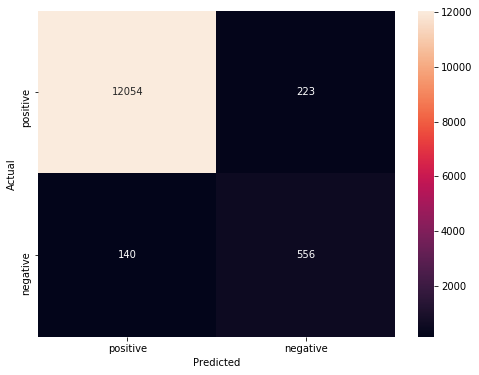

In [41]:
# matrix to measure classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

class_names=df_data['tag'].unique()

# print classification scores 
print(metrics.classification_report(y_test, y_pred,labels=['positive','negative'],target_names=['positive','negative']))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred,labels=['positive','negative'])

print(conf_mat)
print(matthews_corrcoef(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Ensemble 
- not implimented in final result 

In [42]:
classifier1 = LogisticRegression(random_state=0,class_weight='balanced')
classifier2 = SGDClassifier()
classifier3=LinearSVC(class_weight='balanced')
#classifier4= RandomForestClassifier()

## fitting the model
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)
#classifier4.fit(X_train, y_train)


# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)
#y_pred4 = classifier4.predict(X_test)



In [87]:
y_pred1

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [55]:
ensem=pd.DataFrame({'col1':y_pred1,'col2':y_pred2,'col3':y_pred3})
ensem.head()

,col1,col2,col3
0,positive,positive,positive
1,positive,positive,positive
2,positive,positive,positive
3,positive,positive,positive
4,positive,positive,positive


In [98]:
ensem1=ensem.replace('positive',1).replace('negative',0)
ensem1.head()

,col1,col2,col3
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [95]:
## fitting the model

X2=ensem1.iloc[:,0:3]
y2=y_test

classifier = LogisticRegression(random_state=0,class_weight='balanced')

classifier.fit(X2, y2)
# Predicting the Test set results
y_pred2 = classifier.predict(X2)

In [96]:
y_pred2

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'negative'], dtype=object)

              precision    recall  f1-score   support

    positive       0.99      0.99      0.99     24494
    negative       0.79      0.78      0.79      1452

   micro avg       0.98      0.98      0.98     25946
   macro avg       0.89      0.88      0.89     25946
weighted avg       0.98      0.98      0.98     25946

[[24202   292]
 [  321  1131]]
0.774322240020098


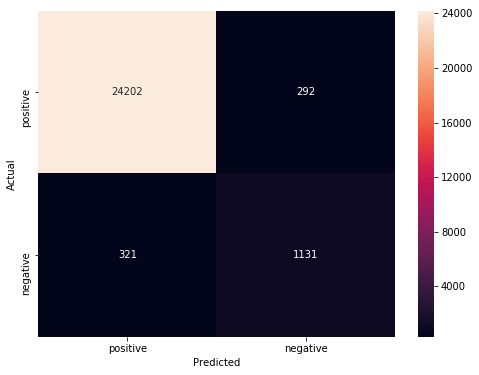

In [97]:
# matrix to measure classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

class_names=df_data['tag'].unique()

# print classification scores 
print(metrics.classification_report(y_test, y_pred2,labels=['positive','negative'],target_names=['positive','negative']))

# print confusion matric
conf_mat = confusion_matrix(y_test, y_pred2,labels=['positive','negative'])

print(conf_mat)
print(matthews_corrcoef(y_test, y_pred2))

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Final test data prediction


In [35]:
import os
import glob

#Test
files = glob.glob('/home/ubuntu/reviews_hackathon_data_Train_test_problem_statement/reviews_hackathon_data_Train_test_problem_statement/test/*.json')
contect_list = []
name_list = []
for file in files:
    name_list.append(file.split('/')[6])
    with open(file) as f:
        data = json.load(f)
        contect_list.append(data)
    
test_data=pd.io.json.json_normalize(contect_list)
test_data['Filename'] = name_list



In [36]:
test_data.head()

,author,crawled,entities.locations,entities.organizations,entities.persons,external_links,highlightText,highlightTitle,language,locations,...,thread.social.vk.shares,thread.spam_score,thread.title,thread.title_full,thread.url,thread.uuid,title,url,uuid,Filename
0,Walter Simmons,2017-03-30T07:10:27.079+03:00,[],[],[],[],,,english,[],...,0,0.000,Walter Simmons,"Figi's, Inc. reviewed by Walter Simmons",https://www.trustpilot.com/reviews/58bc5f95ed3...,a170b5e7c924dc27eab88e452e31b3fe4c48d322,Walter Simmons,https://www.trustpilot.com/reviews/58bc5f95ed3...,a170b5e7c924dc27eab88e452e31b3fe4c48d322,a9c7fa67b74bc999a6fb120f4f898905.json
1,Laura Kirpėja Luton,2017-03-29T14:17:57.017+03:00,[],[],[],[],,,english,[],...,0,0.743,Laura Kirpėja Luton,BloomingWay.com reviewed by Laura Kirpėja Luton,https://www.trustpilot.com/reviews/58ce8c4da91...,039fde2278d962695417c790a73b84e59621ff8c,Laura Kirpėja Luton,https://www.trustpilot.com/reviews/58ce8c4da91...,039fde2278d962695417c790a73b84e59621ff8c,8fde5d48403ae4c2a9be755409124205.json
2,Rulo Quintanilla,2017-03-27T16:27:38.188+03:00,[],[],[],[],,,english,[],...,0,0.015,Rulo Quintanilla,Tomtop 的点评人 Rulo Quintanilla,https://cn.trustpilot.com/reviews/58d8e9f0774f...,a56b77275ef8e4ec265f5fc3e5c904511593ee43,Rulo Quintanilla,https://cn.trustpilot.com/reviews/58d8e9f0774f...,a56b77275ef8e4ec265f5fc3e5c904511593ee43,dd5baa86179ce10ebb6207804ccc2e83.json
3,Lablover,2017-03-28T13:36:13.179+03:00,[],[],[],[],,,english,[],...,0,0.002,Lablover,Groupon reviewed by Lablover,https://www.trustpilot.com/reviews/58c9f669ed3...,cd4ad2e07a9e44c28f2b506cf8d3924fc440b66d,Lablover,https://www.trustpilot.com/reviews/58c9f669ed3...,cd4ad2e07a9e44c28f2b506cf8d3924fc440b66d,a53e449bb03a6a1c5b56bdac6cfbd4e3.json
4,Dhr. Jasper Timmermans,2017-02-08T06:25:07.445+02:00,[],[],[],[],,,english,[],...,0,0.000,Dhr. Jasper Timmermans,Lobbes.nl Beoordeeld door Dhr. Jasper Timmermans,https://nl.trustpilot.com/reviews/58888f2e7b45...,89d7fa08056bf5aff30d110e5dc8e9ae9383c113,Dhr. Jasper Timmermans,https://nl.trustpilot.com/reviews/58888f2e7b45...,89d7fa08056bf5aff30d110e5dc8e9ae9383c113,880eab434ba2d9904c563c898f2ac10f.json


In [37]:
df1_test=test_data[['text','Filename']]
#df1
df1_test=df1_test.dropna(subset=['text']) # remove nan from Customer column by droping row
df1_test['sentiment_scores']=df1_test.apply(sentiment_analyzer_scores1,axis=1)
df1_test['compound_score']=df1_test['sentiment_scores'].apply(lambda raw:raw['compound'])
df1_test['neg_score']=df1_test['sentiment_scores'].apply(lambda raw:raw['neg'])
df1_test['pos_score']=df1_test['sentiment_scores'].apply(lambda raw:raw['pos'])
df1_test['neu_score']=df1_test['sentiment_scores'].apply(lambda raw:raw['neu'])
df1_test['sentiment_pred']=df1_test.apply(compound_to_nps_cat1,axis=1)
df1_test.head()

,text,Filename,sentiment_scores,compound_score,neg_score,pos_score,neu_score,sentiment_pred
0,Do yourselves a favor and don't even consider ...,a9c7fa67b74bc999a6fb120f4f898905.json,"{'neg': 0.215, 'neu': 0.714, 'pos': 0.07, 'com...",-0.9470,0.215,0.070,0.714,NEGATIVE
1,"So after a month and opening a paypal case, af...",8fde5d48403ae4c2a9be755409124205.json,"{'neg': 0.133, 'neu': 0.798, 'pos': 0.069, 'co...",-0.5411,0.133,0.069,0.798,NEGATIVE
2,I bought a Mavic Pro last march 22 (today is t...,dd5baa86179ce10ebb6207804ccc2e83.json,"{'neg': 0.0, 'neu': 0.969, 'pos': 0.031, 'comp...",0.0772,0.000,0.031,0.969,POSITIVE
3,Defective product. Communication is horrible a...,a53e449bb03a6a1c5b56bdac6cfbd4e3.json,"{'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'comp...",-0.9746,0.315,0.000,0.685,NEGATIVE
4,"HOUTEN PUZZELS GEKOCHT, PRIMA KWALITEIT EN NIE...",880eab434ba2d9904c563c898f2ac10f.json,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,POSITIVE


In [42]:
reviews_test = np.array(df1_test['text'])

# Creating the Bag of Words model
cv = CountVectorizer(ngram_range=(1,3),max_features=223220)
X2 = cv.fit_transform(reviews_test)


# adding sentiment score to the sparce matrix

X2=hstack((X2,np.array(df1_test.compound_score)[:,None]))
X2=hstack((X2,np.array(df1_test.neg_score)[:,None]))
X2=hstack((X2,np.array(df1_test.pos_score)[:,None]))
X2=hstack((X2,np.array(df1_test.neu_score)[:,None]))

X2


<3645x223224 sparse matrix of type '<class 'numpy.float64'>'
	with 440730 stored elements in COOrdinate format>

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X2)


In [44]:
y_pred

array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [46]:
filename=np.array(df1_test['Filename'])

array(['a9c7fa67b74bc999a6fb120f4f898905.json',
       '8fde5d48403ae4c2a9be755409124205.json',
       'dd5baa86179ce10ebb6207804ccc2e83.json', ...,
       'fc3723b18bdda2779dbd49c9c97db251.json',
       'c4c26297c9ab7aab3bdd488247c39553.json',
       '1838f544c233d9ef7cd637724c71f303.json'], dtype=object)

In [48]:

final_pred_table=pd.DataFrame({'Filename':np.array(df1_test['Filename']),'Prediction':y_pred})
final_pred_table

,Filename,Prediction
0,a9c7fa67b74bc999a6fb120f4f898905.json,negative
1,8fde5d48403ae4c2a9be755409124205.json,negative
2,dd5baa86179ce10ebb6207804ccc2e83.json,positive
3,a53e449bb03a6a1c5b56bdac6cfbd4e3.json,negative
4,880eab434ba2d9904c563c898f2ac10f.json,positive
5,73892d45350655352dcf1e35c3aa51cc.json,positive
6,4d659dedbc7e3e206a3283aba19b70f8.json,positive
7,6a8816738e23a34bb795c3c7d8404e2d.json,positive
8,90e1c54dc89fb7d155985202b7883f96.json,positive
9,8909b69b5b38910063d43f3987c50fed.json,negative


In [49]:
final_pred_table.to_csv('output.csv')
final_pred_table.to_csv('F03117_F03089.csv')